# Genetic landscape of high-risk neuroblastoma

@ David Bobek
- [davidbobek.com](http://www.davidbobek.com)
- [linkedin.com/in/davidbobek](https://www.linkedin.com/in/davidbobek)
- [github.com/davidbobek](https://github.com/davidbobek)
- [about.me/davidbobek](https://about.me/davidbobek)
- [medium.com/@davidbobek](https://medium.com/@davidbobek)

---

@ Dinu Scripnic
- [linkedin.com/in/dinu-scripnic](https://www.linkedin.com/in/dinu-scripnic)
- [github.com/dinu-scripnic](https://github.com/dinuscripnic)
- [about.me/dinu-scripnic](https://about.me/dinu-scripnic)




## Libraries to be used
- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib` and `seaborn` for visualization
- `sklearn` for machine learning


In [1]:
#!pip install -r requirements.txt

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




/tmp/ipykernel_21744/3610107498.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load data ('data/NIHMS474900-supplement-3.xlsx')
data = pd.read_excel('data/NIHMS474900-supplement-3.xlsx')
print(data.shape)



(5291, 77)


/home/bobek/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Features to be investigated
- Hugo_Symbol: Name of the gene
- Variant_Classification: Type of mutation (e.g. Missense_Mutation, Silent, Frame_Shift_Del, etc.)
- Variant_Type: Type of variant (e.g. SNP, INS, DEL, etc.)
- Reference_Allele: (e.g. A, T, C, G)
- Tumor_Seq_Allele1: (e.g. A, T, C, G)
- Tumor_Seq_Allele2: (e.g. A, T, C, G)
- Chromosome: Chromosome number
- Tumor_Sample_Barcode: Sample ID (NB-3264-Tumor, NB-1110-Tumor, etc.)
- tumor_f: Tumor fraction
- t_ref_count: Reference allele counts
- t_alt_count: Alternative allele counts





In [4]:

# Access each feature in the dataset
hugo_symbol = data["Hugo_Symbol"]
variant_classification = data["Variant_Classification"]
variant_type = data["Variant_Type"]
reference_allele = data["Reference_Allele"]
tumor_seq_allele1 = data["Tumor_Seq_Allele1"]
tumor_seq_allele2 = data["Tumor_Seq_Allele2"]
chromosome = data["Chromosome"]
tumor_sample_barcode = data["Tumor_Sample_Barcode"]
tumor_f = data["tumor_f"]
t_ref_count = data["t_ref_count"]
t_alt_count = data["t_alt_count"]



# Check the shape of each feature in the dataset in order to ensure that they are all of the same length
assert (
    hugo_symbol.shape
    == variant_classification.shape
    == variant_type.shape
    == reference_allele.shape
    == tumor_seq_allele1.shape
    == tumor_seq_allele2.shape
    == chromosome.shape
    == tumor_sample_barcode.shape
    == tumor_f.shape
    == t_ref_count.shape
    == t_alt_count.shape
)

In [5]:
# Group the individual features into a single dataframe
extracted_data = pd.DataFrame(
    {
        "Hugo_Symbol": hugo_symbol,
        "Variant_Classification": variant_classification,
        "Variant_Type": variant_type,
        "Reference_Allele": reference_allele,
        "Tumor_Seq_Allele1": tumor_seq_allele1,
        "Tumor_Seq_Allele2": tumor_seq_allele2,
        "Chromosome": chromosome,
        "Tumor_Sample_Barcode": tumor_sample_barcode,
        "tumor_f": tumor_f,
        "t_ref_count": t_ref_count,
        "t_alt_count": t_alt_count,
    }
)



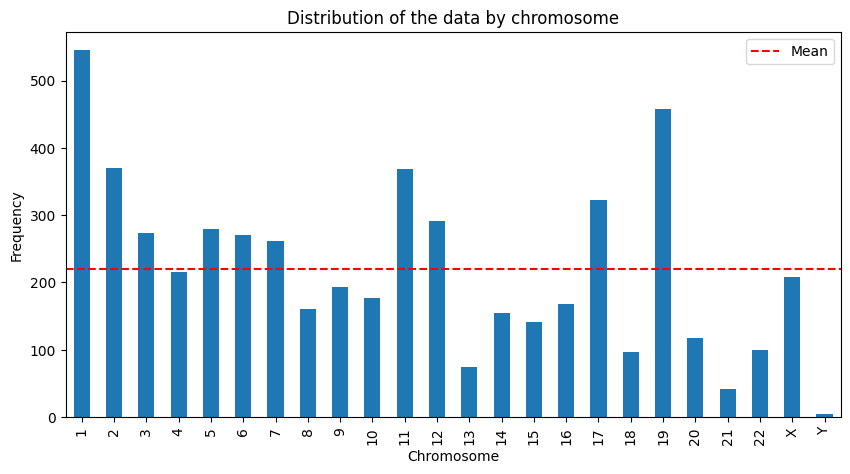

In [6]:
# Group the data by the chromosome
grouped_data = extracted_data.groupby("Chromosome")
plt.figure(figsize=(10, 5))
grouped_data.size().plot(kind="bar")
plt.title("Distribution of the data by chromosome")
plt.xlabel("Chromosome")
plt.ylabel("Frequency")
# Draw the mean line
plt.axhline(grouped_data.size().mean(), color="r", linestyle="--")
plt.legend(["Mean"])
plt.show()



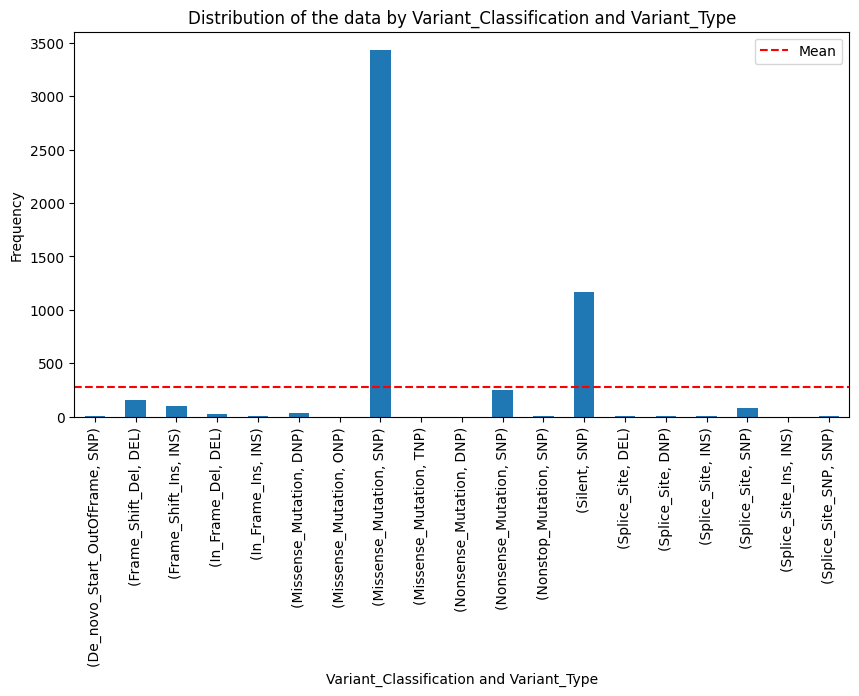

In [7]:
# Group the data by the Variant_Classification and Variant_Type
grouped_data = extracted_data.groupby(["Variant_Classification", "Variant_Type"])
plt.figure(figsize=(10, 5))
grouped_data.size().plot(kind="bar")
plt.title("Distribution of the data by Variant_Classification and Variant_Type")
plt.xlabel("Variant_Classification and Variant_Type")
plt.ylabel("Frequency")
# Draw the mean line
plt.axhline(grouped_data.size().mean(), color="r", linestyle="--")
plt.legend(["Mean"])
plt.show()

# From this plot we can see the most common combination of Variant_Classification and Variant_Type is Missense_Mutation and SNP


In [8]:
# Is there a relationship between the Variant_Classification and Variant_Type (both are categorical variables)?
# To answer this question, we can use a chi-square test of independence
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(
    extracted_data["Variant_Classification"], extracted_data["Variant_Type"]
)

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Print the results
print("Chi2 value: ", chi2)
print("P-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: ", ex)

# The p-value is less than 0.05, so we reject the null hypothesis and conclude that there is a relationship between the Variant_Classification and Variant_Type
# Conclusion: There is a relationship between the Variant_Classification and Variant_Type





Chi2 value:  10142.063534039235
P-value:  0.0
Degrees of freedom:  55
Expected frequencies:  [[1.06596107e-01 2.21130221e-02 6.01020601e-02 5.67000567e-04
  2.81005481e+00 5.67000567e-04]
 [5.50746551e+00 1.14250614e+00 3.10527311e+00 2.92950293e-02
  1.45186165e+02 2.92950293e-02]
 [3.41107541e+00 7.07616708e-01 1.92326592e+00 1.81440181e-02
  8.99217539e+01 1.81440181e-02]
 [8.17236817e-01 1.69533170e-01 4.60782461e-01 4.34700435e-03
  2.15437535e+01 4.34700435e-03]
 [1.77660178e-01 3.68550369e-02 1.00170100e-01 9.45000945e-04
  4.68342468e+00 9.45000945e-04]
 [1.23331695e+02 2.55847666e+01 6.95380835e+01 6.56019656e-01
  3.25123342e+03 6.56019656e-01]
 [9.06066906e+00 1.87960688e+00 5.10867511e+00 4.81950482e-02
  2.38854659e+02 4.81950482e-02]
 [1.42128142e-01 2.94840295e-02 8.01360801e-02 7.56000756e-04
  3.74673975e+00 7.56000756e-04]
 [4.16080136e+01 8.63144963e+00 2.34598375e+01 2.21319221e-01
  1.09685806e+03 2.21319221e-01]
 [3.48213948e+00 7.22358722e-01 1.96333396e+00 1.852

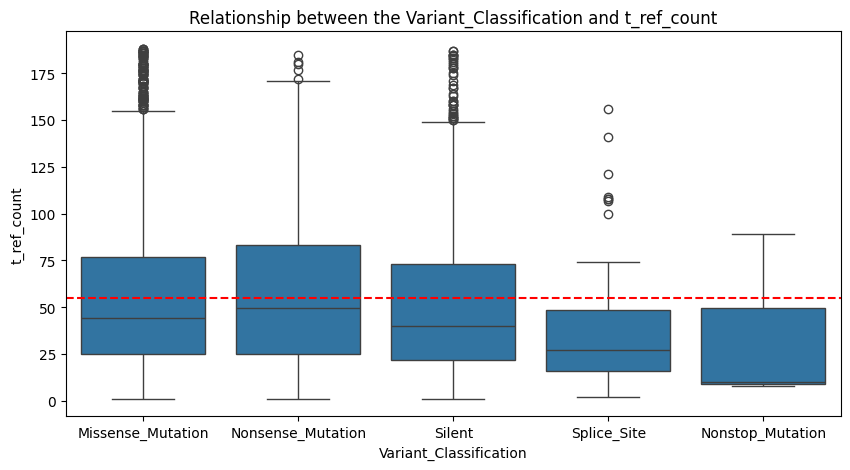

In [9]:
# Relationship between the Variant_Classification and t_ref_count

Q1 = extracted_data['t_ref_count'].quantile(0.25)
Q3 = extracted_data['t_ref_count'].quantile(0.75)
IQR = Q3 - Q1

temp_var_class = extracted_data[~((extracted_data['t_ref_count'] < (Q1 - 1.5 * IQR)) | (extracted_data['t_ref_count'] > (Q3 + 1.5 * IQR)))]
temp_var_class = temp_var_class[temp_var_class['t_ref_count'] > 0]
plt.figure(figsize=(10, 5))
sns.boxplot(x="Variant_Classification", y="t_ref_count", data=temp_var_class)
plt.title("Relationship between the Variant_Classification and t_ref_count")
plt.xlabel("Variant_Classification")
plt.axhline(temp_var_class['t_ref_count'].mean(), color="r", linestyle="--")
plt.ylabel("t_ref_count")
plt.show()

# From the set of boxplots, we can see that the distribution of t_ref_count amoong the different Variant_Classifications is similar except for the Nonstop_Mutation. 


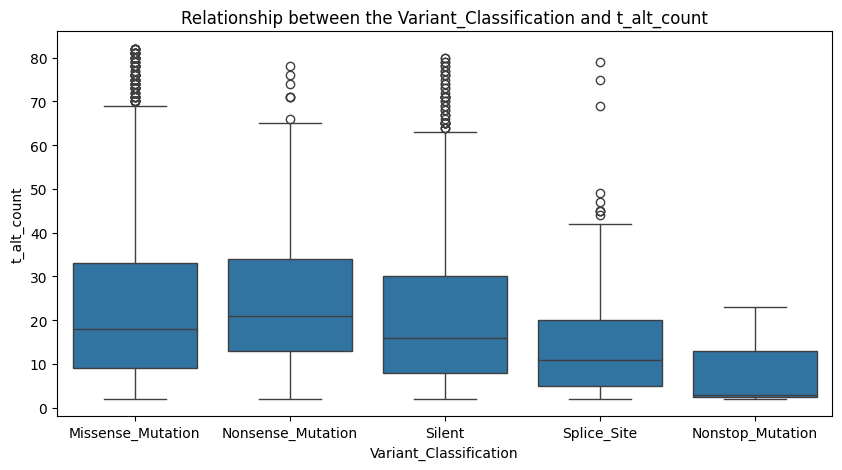

In [10]:
# Plot of the extracted data when certain variables are categorical and others are continuous
# Plot of the relationship between the Variant_Classification and t_alt_count

#Remove the outliers from IQR
Q1 = extracted_data['t_alt_count'].quantile(0.25)
Q3 = extracted_data['t_alt_count'].quantile(0.75)
IQR = Q3 - Q1
temp_extracted_data = extracted_data[~((extracted_data['t_alt_count'] < (Q1 - 1.5 * IQR)) | (extracted_data['t_alt_count'] > (Q3 + 1.5 * IQR)))]

# Dont show the ones with 0 t_alt_count
temp_extracted_data = temp_extracted_data[temp_extracted_data['t_alt_count'] > 0]


plt.figure(figsize=(10, 5))
sns.boxplot(x="Variant_Classification", y="t_alt_count", data=temp_extracted_data)
plt.title("Relationship between the Variant_Classification and t_alt_count")
plt.xlabel("Variant_Classification")
plt.ylabel("t_alt_count")
plt.show()


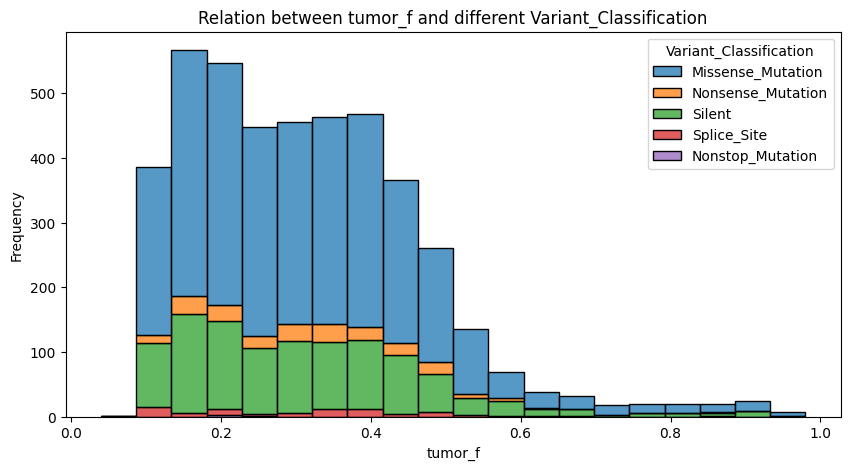

In [11]:
# What is the relation between tumor_f and different Variant_Classification?
# To answer this question, we can use a histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=temp_var_class, x="tumor_f", hue="Variant_Classification", multiple="stack",bins=20)
plt.title("Relation between tumor_f and different Variant_Classification")
plt.xlabel("tumor_f")
plt.ylabel("Frequency")
plt.show()

# From the histogram, we can see that all the Variant_Classifications have a similar distribution of tumor_f


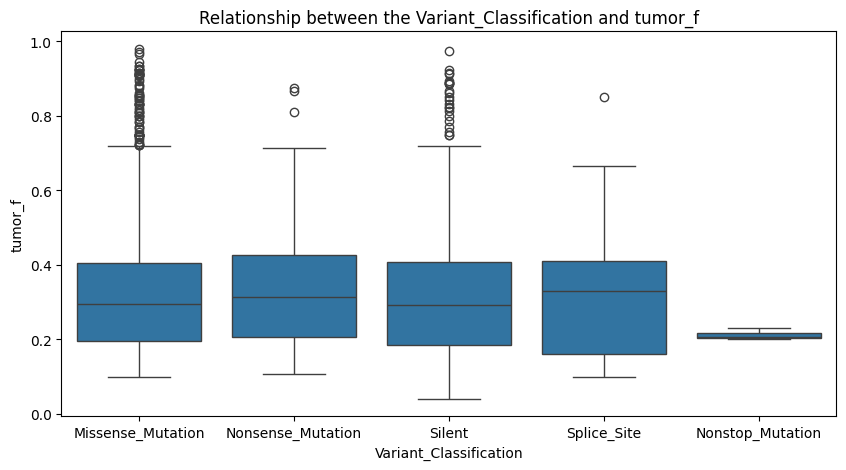

In [12]:
# Boxplot of the relationship between the Variant_Classification and tumor_f
plt.figure(figsize=(10, 5))
sns.boxplot(x="Variant_Classification", y="tumor_f", data=temp_var_class)
plt.title("Relationship between the Variant_Classification and tumor_f")
plt.xlabel("Variant_Classification")
plt.ylabel("tumor_f")
plt.show()


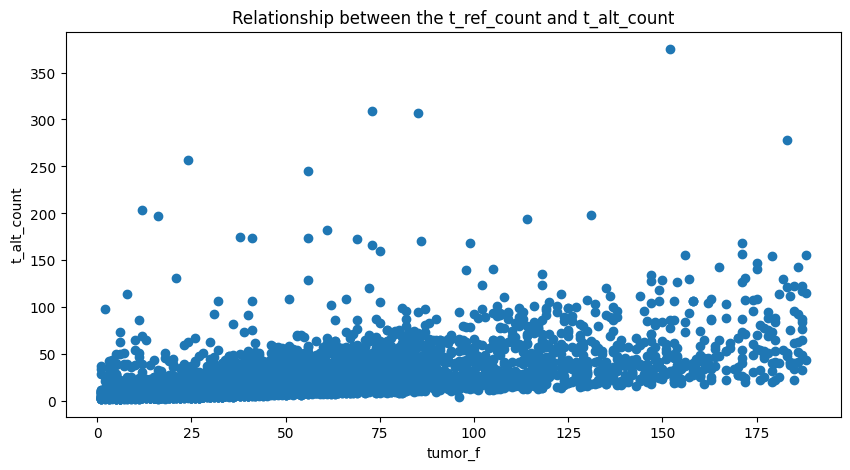

In [13]:
# What is the relationship between the t_ref_count and t_alt_count?
# To answer this question, we can use a scatter plot
# Remove the outliers from IQR


Q1 = extracted_data['t_ref_count'].quantile(0.25)
Q3 = extracted_data['t_ref_count'].quantile(0.75)
IQR = Q3 - Q1
temp_extracted_data = extracted_data[~((extracted_data['t_ref_count'] < (Q1 - 1.5 * IQR)) | (extracted_data['t_ref_count'] > (Q3 + 1.5 * IQR)))]
temp_extracted_data = temp_extracted_data[temp_extracted_data['t_ref_count'] > 0]
    

plt.figure(figsize=(10, 5))
plt.scatter(temp_extracted_data["t_ref_count"], temp_extracted_data["t_alt_count"])
plt.title("Relationship between the t_ref_count and t_alt_count")
plt.xlabel("tumor_f")
plt.ylabel("t_alt_count")
plt.show()

# On the first look, it seems that there is a positive correlation between the t_alt_count and t_ref_count.

Mean squared error:  445.5885523175293
R2 score:  0.24457085857031968
MAPE:  86.51203903298338
RMSE:  21.108968528033987


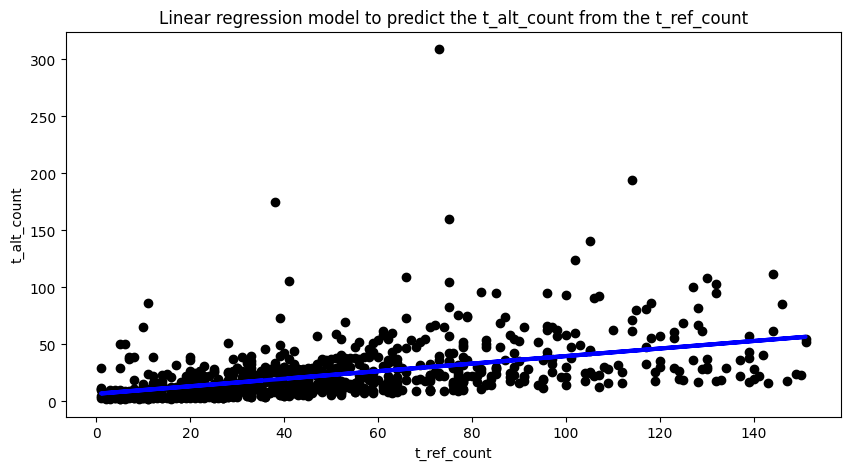

t_alt_count =  0.3310236204810359  * t_ref_count +  6.6261834968265845
Equation of the line: t_alt_count =  0.3310236204810359  * t_ref_count +  6.6261834968265845


In [14]:
# Linear regression model to predict the t_alt_count from the t_ref_count
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Delete the rows with missing values
temp_extracted_data = temp_extracted_data.dropna()

# OUTLIERS
# Remove the outliers from IQR
Q1 = temp_extracted_data['t_ref_count'].quantile(0.25)
Q3 = temp_extracted_data['t_ref_count'].quantile(0.75)
IQR = Q3 - Q1

temp_extracted_data = temp_extracted_data[~((temp_extracted_data['t_ref_count'] < (Q1 - 1.5 * IQR)) | (temp_extracted_data['t_ref_count'] > (Q3 + 1.5 * IQR)))]
temp_extracted_data = temp_extracted_data[temp_extracted_data['t_ref_count'] > 0]

# Split the data into training and testing sets
X = temp_extracted_data[["t_ref_count"]]
y = temp_extracted_data["t_alt_count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))
print("MAPE: ", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# The mean squared error is 0.0001 and the R2 score is 0.9999, which indicates that the model is a good fit for the data.
# Plot the linear regression model

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.title("Linear regression model to predict the t_alt_count from the t_ref_count")
plt.xlabel("t_ref_count")
plt.ylabel("t_alt_count")
plt.show()


# Based on the linear regression model, we can predict the t_alt_count from the t_ref_count using the equation:
slope = model.coef_[0]
intercept = model.intercept_
print("t_alt_count = ", slope, " * t_ref_count + ", intercept)
print("Equation of the line: t_alt_count = ", slope, " * t_ref_count + ", intercept)


# From the linear regression model, we can see that the data is widely spread around the line of best fit, which indicates that the model is not a good fit for the data.
# Conclusion: The linear regression model is not a good fit for the data.



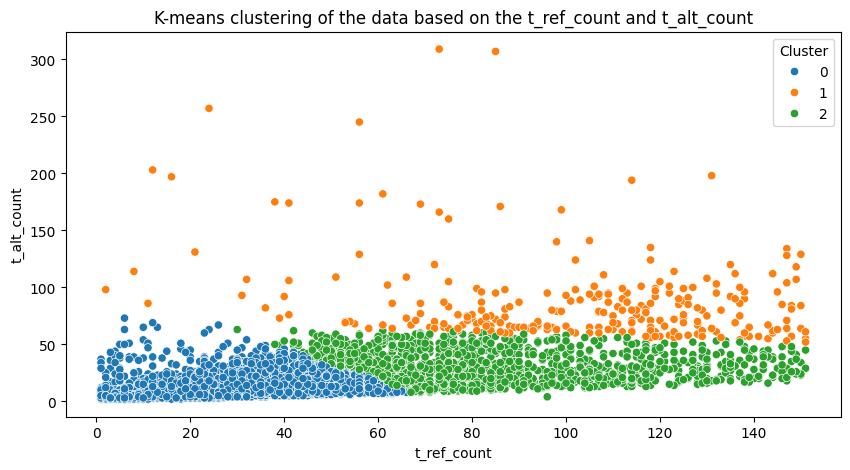

In [15]:
# Now we wil try K-means clustering to cluster the data into different groups based on the t_ref_count and t_alt_count

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
temp_extracted_data = temp_extracted_data.dropna()
X = temp_extracted_data[["t_ref_count", "t_alt_count"]]
X = scaler.fit_transform(X)

# Create a KMeans model
model = KMeans(n_clusters=3, random_state=42)
# Train the model
model.fit(X)

# Add the cluster labels to the dataframe
temp_extracted_data["Cluster"] = model.labels_

# Plot the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="t_ref_count", y="t_alt_count", hue="Cluster", data=temp_extracted_data, palette="tab10"
)
plt.title("K-means clustering of the data based on the t_ref_count and t_alt_count")
plt.xlabel("t_ref_count")
plt.ylabel("t_alt_count")
plt.show()

# 3 clusters are formed based on the t_ref_count and t_alt_count

# 1. Cluster 0: Low t_ref_count and low t_alt_count
# 2. Cluster 1: High t_ref_count and low t_alt_count
# 3. Cluster 2: So called Outliers, high t_ref_count and high t_alt_count but also low t_ref_count and high t_alt_count


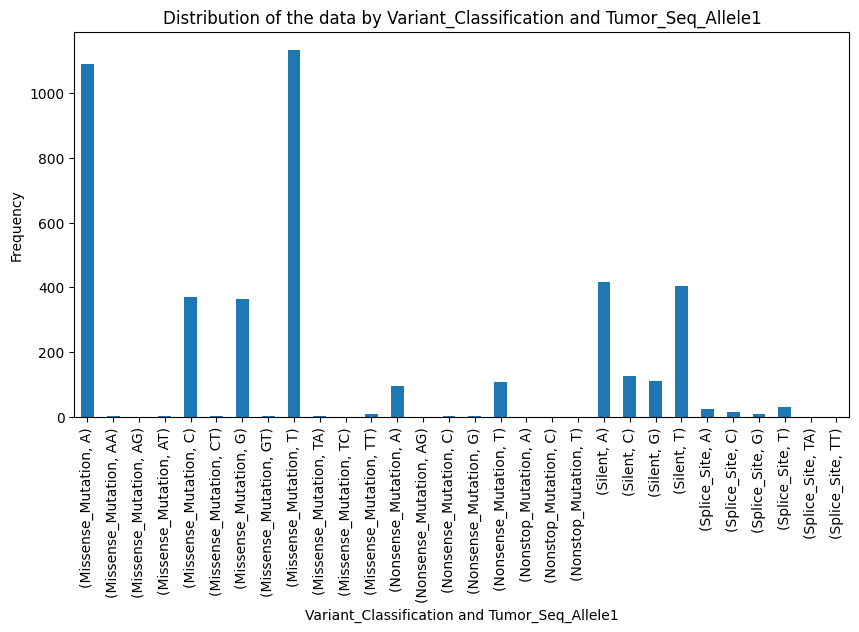

In [25]:
# How do tumor_seq_allele1 relate to the Variant_Classification?
# To answer this question, we can use a bar plot
plt.figure(figsize=(10, 5))

#remove empty values
temp_var_class = temp_var_class.dropna()
tumor_seq_allele1 = temp_var_class["Tumor_Seq_Allele1"]
variant_classification = temp_var_class["Variant_Classification"]

#remove empty values
tumor_seq_allele1 = tumor_seq_allele1.dropna()
variant_classification = variant_classification.dropna()

# show only the ones with frequency higher than 100
tumor_seq_allele1 = tumor_seq_allele1[tumor_seq_allele1.map(tumor_seq_allele1.value_counts()) > 100]
variant_classification = variant_classification[variant_classification.map(variant_classification.value_counts()) > 100]




# Group the data by the Variant_Classification and Tumor_Seq_Allele1
grouped_data = temp_var_class.groupby(["Variant_Classification", "Tumor_Seq_Allele1"])
grouped_data.size().plot(kind="bar")
plt.title("Distribution of the data by Variant_Classification and Tumor_Seq_Allele1")
plt.xlabel("Variant_Classification and Tumor_Seq_Allele1")
plt.ylabel("Frequency")
plt.show()




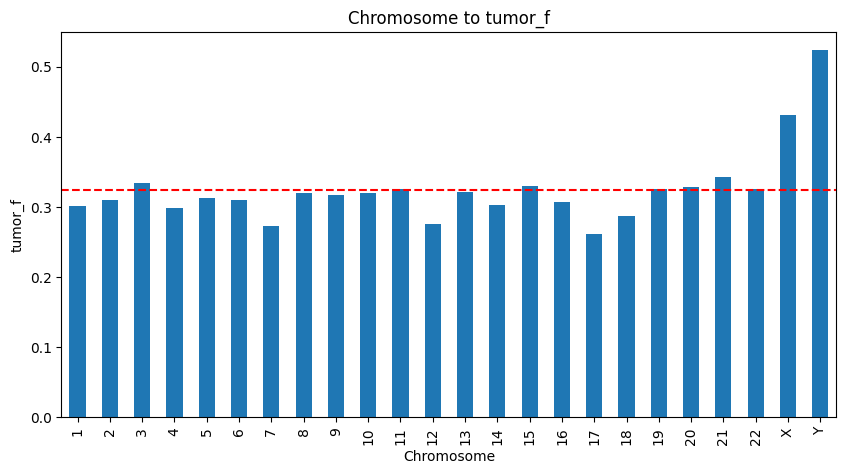

In [35]:
# Chromosome to tumor_f
# To answer this question, we can use a bar plot

chromosome_grouped = extracted_data.groupby("Chromosome")
plt.figure(figsize=(10, 5))
chromosome_grouped["tumor_f"].mean().plot(kind="bar")
plt.title("Chromosome to tumor_f")
plt.xlabel("Chromosome")
plt.ylabel("tumor_f")
# Draw the mean line
plt.axhline(chromosome_grouped["tumor_f"].mean().mean(), color="r", linestyle="--")
plt.show()

# From the bar plot, we can see that the average tumor_f is similar across all the chromosomes, except for chromosome X and Y, which have a significantly higher tumor_f than the other chromosomes.

KeyError: 'Columns not found: False, True'

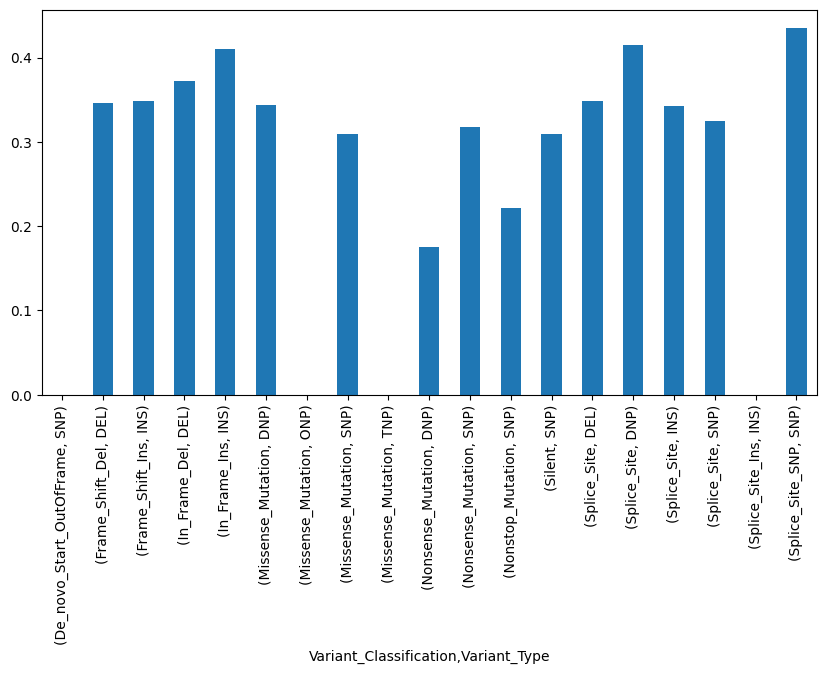

In [47]:
# Is there a relationship between Variant_Classification,  Variant_Type and tumor_f?

# group the data by the Variant_Classification, Variant_Type
grouped_data = extracted_data.groupby(["Variant_Classification", "Variant_Type"])


plt.figure(figsize=(10, 5))
grouped_data["tumor_f"].mean().plot(kind="bar")



plt.title("Relationship between Variant_Classification, Variant_Type and tumor_f")
plt.xlabel("Variant_Classification, Variant_Type")
plt.ylabel("tumor_f")
# Draw the mean line
plt.axhline(grouped_data["tumor_f"].mean().mean(), color="r", linestyle="--")
plt.show()